In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load in the genre data
data_genre = pd.read_csv('autotagging_genre.csv')
data_genre.head()
#C:\Users\olive\OneDrive\Desktop\DS\ANN_DIS\autotagging_genre.csv

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,GENRE_1,GENRE_2,GENRE_2.1,GENRE_3,GENRE_4,GENRE_5
0,track_0000214,artist_000014,album_000031,14/214.mp3,124.6,genre---punkrock,NaN,NaN,NaN,NaN,NaN
1,track_0000215,artist_000014,album_000031,15/215.mp3,151.4,genre---metal,NaN,NaN,NaN,NaN,NaN
2,track_0000216,artist_000014,album_000031,16/216.mp3,234.9,genre---metal,NaN,NaN,NaN,NaN,NaN
3,track_0000217,artist_000014,album_000031,17/217.mp3,127.9,genre---punkrock,NaN,NaN,NaN,NaN,NaN
4,track_0000218,artist_000014,album_000031,18/218.mp3,180.7,genre---punkrock,NaN,NaN,NaN,NaN,NaN


In [3]:
#clean up names of genres
for genre in ('GENRE_1', 'GENRE_2', 'GENRE_3', 'GENRE_4', 'GENRE_5'):
    data_genre[genre] = data_genre[genre].str[8:]
#see all unique genres there are
all_genres = data_genre['GENRE_1'].unique()
for genre in all_genres:
    print(genre)

punkrock
metal
rock
pop
classical
electronic
easylistening
disco
ambient
chillout
breakbeat
industrial
alternative
drumnbass
instrumentalpop
funk
jazz
grunge
experimental
folk
chanson
dub
dance
blues
downtempo
fusion
improvisation
instrumentalrock
reggae
popfolk
soundtrack
club
minimal
country
groove
choir
celtic
hard
gothic
acidjazz
indie
ethnicrock
triphop
newwave
contemporary
world
techno
darkambient
orchestral
ethno
poprock
alternativerock
atmospheric
70s
rnb
bossanova
psychedelic
newage
african
60s
eurodance
trance
hiphop
hardrock
90s
lounge
latin
darkwave
oriental
heavymetal
classicrock
bluesrock
soul
progressive
rap
jazzfunk
edm
deephouse
singersongwriter
ska
rocknroll
dubstep
electropop
house
idm
postrock
80s
synthpop
tribal
medieval
electronica
jazzfusion
symphonic
swing


In [4]:
#i also want to see the distribution of genres
genre_counts = data_genre['GENRE_1'].value_counts()
print(genre_counts)

GENRE_1
electronic       7379
ambient          7174
classical        4611
alternative      3692
easylistening    2889
                 ... 
idm                11
soul               10
tribal              6
symphonic           4
swing               2
Name: count, Length: 94, dtype: int64


In [5]:
#these genres are so specific, i need to group them into broader categories
#please note that generative AI was used to help me come up with these groupings
genre_map = {
    # rock_punk
    "rock": "rock_punk",
    "punkrock": "rock_punk",
    "alternativerock": "rock_punk",
    "poprock": "rock_punk",
    "hardrock": "rock_punk",
    "classicrock": "rock_punk",
    "bluesrock": "rock_punk",
    "postrock": "rock_punk",
    "newwave": "rock_punk",
    "grunge": "rock_punk",
    "psychedelic": "rock_punk",
    "indie": "rock_punk",
    "alternative": "rock_punk",
    "hard": "rock_punk",
    "rocknroll": "rock_punk",
    "instrumentalrock": "rock_punk",

    # metal
    "metal": "metal",
    "heavymetal": "metal",
    "industrial": "metal",
    "progressive": "metal",
    "symphonic": "metal",
    "gothic": "metal",
    "darkwave": "metal",

    # pop
    "pop": "pop",
    "electropop": "pop",
    "synthpop": "pop",
    "popfolk": "pop",
    "poprock": "pop",
    "instrumentalpop": "pop",
    "dance": "pop",
    "disco": "pop",

    # electronic_edm
    "electronic": "electronic_edm",
    "edm": "electronic_edm",
    "house": "electronic_edm",
    "deephouse": "electronic_edm",
    "techno": "electronic_edm",
    "trance": "electronic_edm",
    "dubstep": "electronic_edm",
    "eurodance": "electronic_edm",
    "club": "electronic_edm",
    "electronica": "electronic_edm",
    "minimal": "electronic_edm",
    "idm": "electronic_edm",
    "breakbeat": "electronic_edm",
    "drumnbass": "electronic_edm",

    # hiphop_rap
    "hiphop": "hiphop_rap",
    "rap": "hiphop_rap",
    "triphop": "hiphop_rap",

    # jazz_fusion
    "jazz": "jazz_fusion",
    "acidjazz": "jazz_fusion",
    "jazzfunk": "jazz_fusion",
    "jazzfusion": "jazz_fusion",
    "swing": "jazz_fusion",
    "fusion": "jazz_fusion",
    "improvisation": "jazz_fusion",
    "blues": "jazz_fusion",
    "bossanova": "jazz_fusion",

    # ambient_chill
    "ambient": "ambient_chill",
    "darkambient": "ambient_chill",
    "chillout": "ambient_chill",
    "downtempo": "ambient_chill",
    "lounge": "ambient_chill",
    "atmospheric": "ambient_chill",
    "newage": "ambient_chill",
    'easylistening': "ambient_chill",

    # funk_soul_rnb
    "funk": "funk_soul_rnb",
    "soul": "funk_soul_rnb",
    "rnb": "funk_soul_rnb",
    "groove": "funk_soul_rnb",
    "reggae": "funk_soul_rnb",
    "dub": "funk_soul_rnb",
    "ska": "funk_soul_rnb",

    # classical_orchestral
    "classical": "classical_orchestral",
    "orchestral": "classical_orchestral",
    "choir": "classical_orchestral",
    "symphonic": "classical_orchestral",
    "contemporary": "classical_orchestral",
    "soundtrack": "classical_orchestral",

    # folk_singersongwriter
    "folk": "folk_singersongwriter",
    "singersongwriter": "folk_singersongwriter",
    "celtic": "folk_singersongwriter",
    "country": "folk_singersongwriter",

    # world_ethnic
    "world": "world_ethnic",
    "ethno": "world_ethnic",
    "ethnicrock": "world_ethnic",
    "african": "world_ethnic",
    "oriental": "world_ethnic",
    "tribal": "world_ethnic",
    "medieval": "world_ethnic",
    "latin": "world_ethnic"
}
#apply the mapping to the GENRE_1 column
data_genre['GENRE_1'] = data_genre['GENRE_1'].map(genre_map).fillna(data_genre['GENRE_1'])

In [6]:
#there were a couple unique genres that didn't fit into the categories
weird = ['chanson', 'experimental', '60s', '70s', '80s', '90s']
data_genre = data_genre.drop(data_genre[data_genre['GENRE_1'].isin(weird)].index)

In [7]:
#further, the world_ethic genre is too broad, so i will drop it
data_genre = data_genre.drop(data_genre[data_genre['GENRE_1'] == 'world_ethnic'].index)
#after running several models, we realized the 'ambient_chill' umbrella was greatly confusing the model
data_genre = data_genre.drop(data_genre[data_genre['GENRE_1'] == 'ambient_chill'].index)


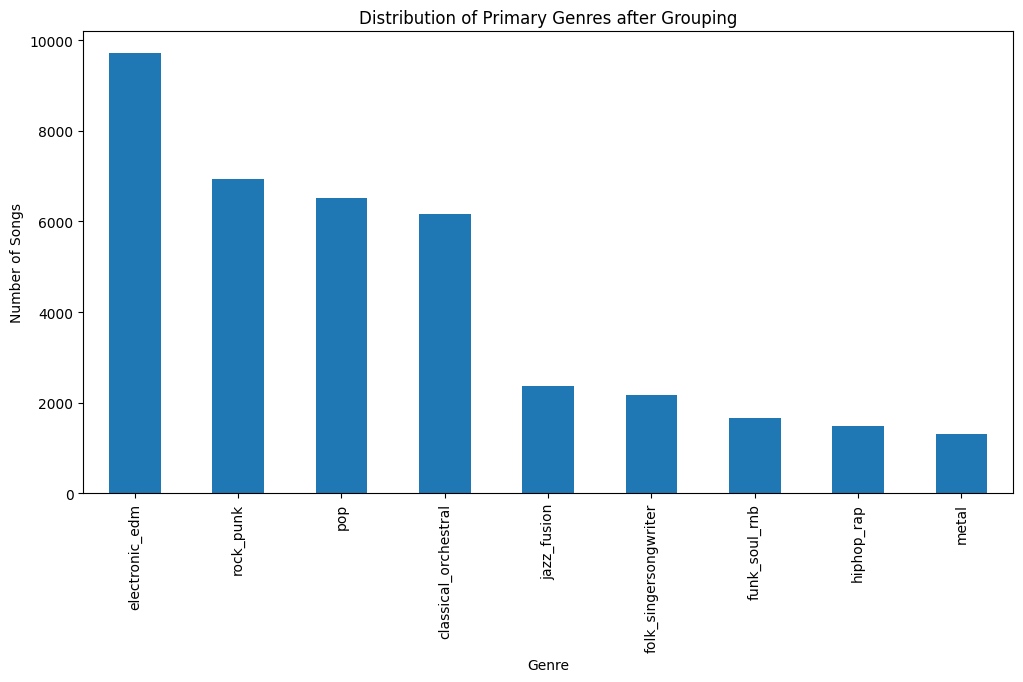

In [8]:
#visualize the new genre distribution
genre_counts = data_genre['GENRE_1'].value_counts()
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Primary Genres after Grouping')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.show()

In [9]:
#create final dataset with only primary genre
genretags = data_genre[['TRACK_ID', 'GENRE_1']]
genretags.head()

,TRACK_ID,GENRE_1
0,track_0000214,rock_punk
1,track_0000215,metal
2,track_0000216,metal
3,track_0000217,rock_punk
4,track_0000218,rock_punk


In [10]:
#remove 'track_' and leading zeroes from TRACK_IDs to match spectrogram filenames
genretags['TRACK_ID'] = genretags['TRACK_ID'].str[6:]
genretags['TRACK_ID'] = genretags['TRACK_ID'].str.lstrip('0')
genretags.head()

C:\Users\olive\AppData\Local\Temp\ipykernel_23852\3916254049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genretags['TRACK_ID'] = genretags['TRACK_ID'].str[6:]
C:\Users\olive\AppData\Local\Temp\ipykernel_23852\3916254049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genretags['TRACK_ID'] = genretags['TRACK_ID'].str.lstrip('0')


,TRACK_ID,GENRE_1
0,214,rock_punk
1,215,metal
2,216,metal
3,217,rock_punk
4,218,rock_punk


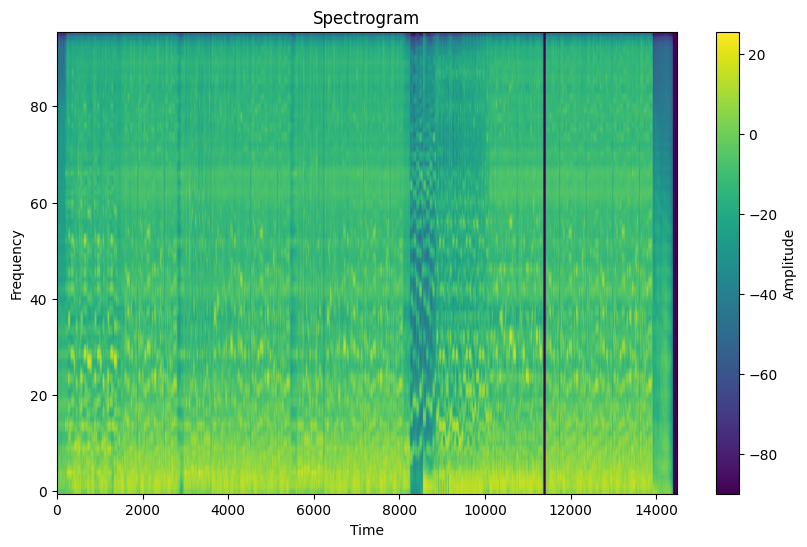

In [11]:
#load and visualize a sample spectrogram
npy_file_path = 'C:/Users/olive/OneDrive/Desktop/DS/ANN_DIS/spectrograms/1100.npy'

spectrogram = np.load(npy_file_path)

plt.figure(figsize=(10, 6))
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [12]:
#turn filenames into list of track IDS
import os
spectrogram_dir = 'C:/Users/olive/OneDrive/Desktop/DS/ANN_DIS/spectrograms'
spectrogram_files = os.listdir(spectrogram_dir)
track_ids = [os.path.splitext(filename)[0] for filename in spectrogram_files]
print(f"Total spectrogram files: {len(spectrogram_files)}")

Total spectrogram files: 8148


In [13]:
#see how many of the spectrogram track IDs are in my final genre dataframe
matched_ids = genretags[genretags['TRACK_ID'].isin(track_ids)]
print(f"Number of matching TRACK_IDs: {len(matched_ids)} out of {len(track_ids)} spectrograms")

Number of matching TRACK_IDs: 5563 out of 8148 spectrograms


In [14]:
matched_ids.head()

,TRACK_ID,GENRE_1
0,214,rock_punk
57,808,pop
58,809,pop
59,810,pop
90,1100,rock_punk


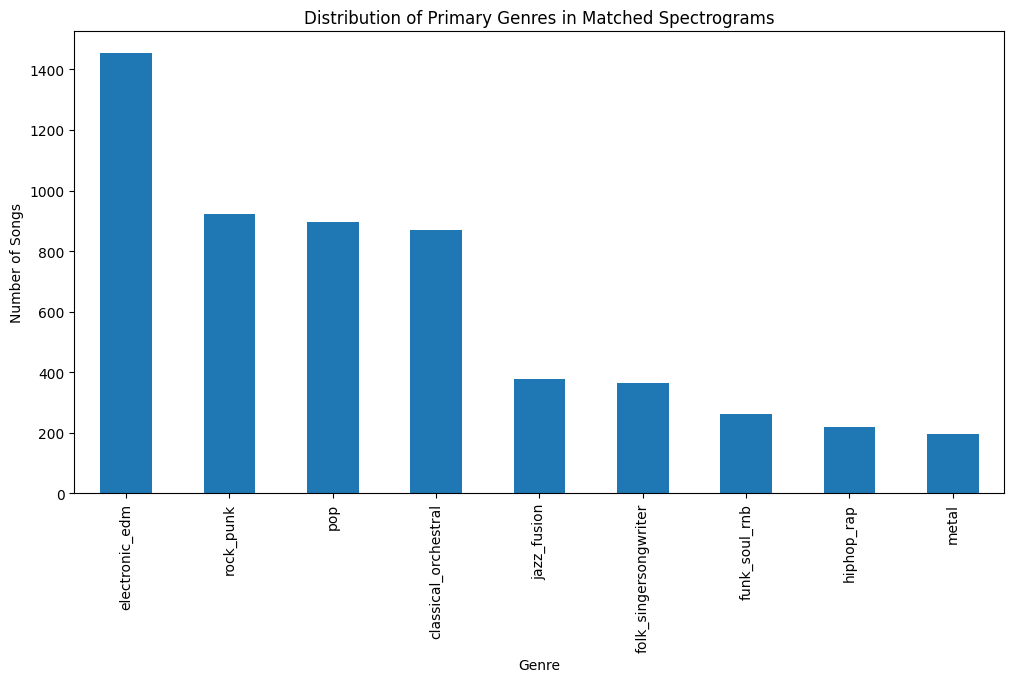

In [15]:
#show distribution of genres in matched IDs
genre_distribution = matched_ids['GENRE_1'].value_counts()
plt.figure(figsize=(12,6))
genre_distribution.plot(kind='bar')
plt.title('Distribution of Primary Genres in Matched Spectrograms')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.show()

In [16]:
#hot one encode the GENRE_1 column
y_encoded = pd.get_dummies(matched_ids, columns=['GENRE_1'])
y_encoded.head()

,TRACK_ID,GENRE_1_classical_orchestral,GENRE_1_electronic_edm,GENRE_1_folk_singersongwriter,GENRE_1_funk_soul_rnb,GENRE_1_hiphop_rap,GENRE_1_jazz_fusion,GENRE_1_metal,GENRE_1_pop,GENRE_1_rock_punk
0,214,False,False,False,False,False,False,False,False,True
57,808,False,False,False,False,False,False,False,True,False
58,809,False,False,False,False,False,False,False,True,False
59,810,False,False,False,False,False,False,False,True,False
90,1100,False,False,False,False,False,False,False,False,True


In [17]:
#actually load in spectrograms as X
spectrogram_dir = 'C:/Users/olive/OneDrive/Desktop/DS/ANN_DIS/spectrograms'
X = []
finished = 0
for track_id in y_encoded['TRACK_ID']:
    npy_path = os.path.join(spectrogram_dir, f"{track_id}.npy")
    spectrogram = np.load(npy_path)
    spectrogram = np.expand_dims(spectrogram, axis=-1)  # add channel dimension
    X.append(spectrogram)
    finished += 1
    total = len(y_encoded['TRACK_ID'])
    if finished % 500 == 0:
        print(f"Processed {finished} out of {total} spectrograms")

Processed 500 out of 5563 spectrograms
Processed 1000 out of 5563 spectrograms
Processed 1500 out of 5563 spectrograms
Processed 2000 out of 5563 spectrograms
Processed 2500 out of 5563 spectrograms
Processed 3000 out of 5563 spectrograms
Processed 3500 out of 5563 spectrograms
Processed 4000 out of 5563 spectrograms
Processed 4500 out of 5563 spectrograms
Processed 5000 out of 5563 spectrograms
Processed 5500 out of 5563 spectrograms


(0.0, 40000.0)

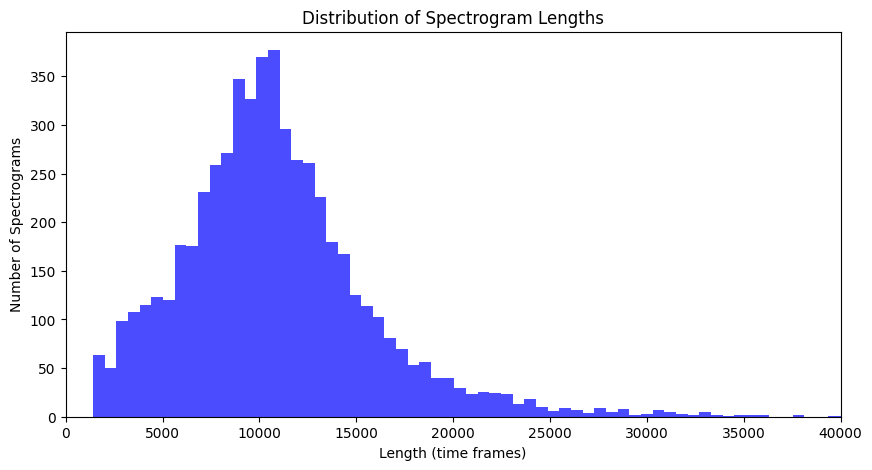

In [18]:
#we need to make all our samples uniform in shape
#let's look at the distribution of spectrogram lengths
lengths = []
for spectrogram in X:
    length = spectrogram.shape[1]
    lengths.append(length)

plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=200, color='blue', alpha=0.7)
plt.title('Distribution of Spectrogram Lengths')
plt.xlabel('Length (time frames)')
plt.ylabel('Number of Spectrograms')
plt.xlim(0, 40000)

In [19]:
#chop larger spectrograms into multiple samples of length min_length, and update Y accordingly
min_length = 1400  # corresponding to about 30 seconds
X_30s = []
y_30s = []
for i in range(len(X)):
    spectrogram = X[i]
    label = y_encoded.iloc[i]
    length = spectrogram.shape[1]
    if length <= min_length:
        X_30s.append(spectrogram)
        y_30s.append(label)
    else:
        num_segments = length // min_length
        for j in range(num_segments):
            start = j * min_length
            end = start + min_length
            segment = spectrogram[:, start:end, :]
            X_30s.append(segment)
            y_30s.append(label)
#delete original X to save memory
del X

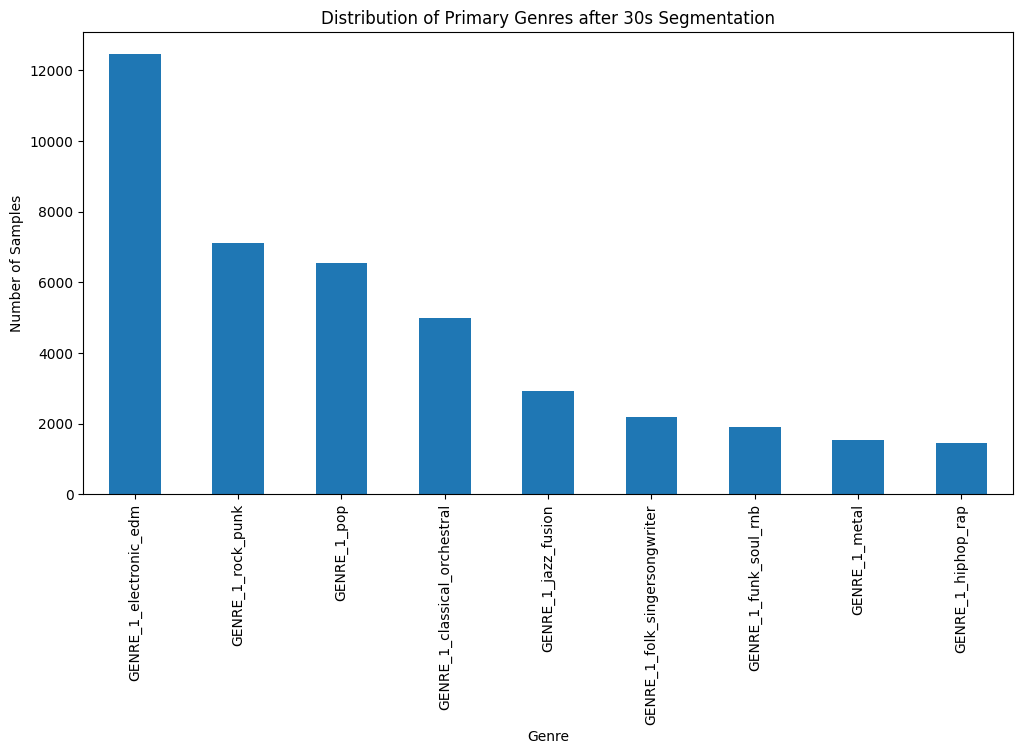

In [20]:
#use y_30s to see new genre distribution of samples
y_30s = pd.DataFrame(y_30s)
genre_counts_30s = y_30s.iloc[:, 1:].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
genre_counts_30s.plot(kind='bar')
plt.title('Distribution of Primary Genres after 30s Segmentation')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.show()

In [21]:
genre_counts_30s

GENRE_1_electronic_edm           12460
GENRE_1_rock_punk                 7115
GENRE_1_pop                       6555
GENRE_1_classical_orchestral      4989
GENRE_1_jazz_fusion               2931
GENRE_1_folk_singersongwriter     2177
GENRE_1_funk_soul_rnb             1892
GENRE_1_metal                     1522
GENRE_1_hiphop_rap                1451
dtype: int64

In [22]:
#random sampling to get a balanced dataset
#limit each genre to max 1450 samples, except for pop, which we've decided to oversample
y_30s = y_30s.reset_index(drop=True)
indeces = list(range(0, len(y_30s)))
np.random.shuffle(indeces)
X_30s_balanced = []
y_30s_balanced = []
genre_sample_counts = {genre: 0 for genre in genre_counts_30s.index}
max_sample_dict = {'GENRE_1_pop': 2500}
max_samples_per_genre = 1450
for i in indeces:
    spectrogram = X_30s[i]
    label = y_30s.iloc[i]
    genre =  label[label == 1].index[0]
    max_samples_per_genre = max_sample_dict.get(genre, 1450)
    if genre_sample_counts[genre] < max_samples_per_genre:
        X_30s_balanced.append(spectrogram)
        y_30s_balanced.append(label)
        genre_sample_counts[genre] += 1


In [23]:
#again, delete old dataframes to save space
del X_30s
del y_30s

In [24]:
y_30s_balanced = pd.DataFrame(y_30s_balanced)
genre_counts_balanced = y_30s_balanced.iloc[:, 1:].sum().sort_values(ascending=False)

In [25]:
genre_counts_balanced

GENRE_1_pop                      2500
GENRE_1_classical_orchestral     1450
GENRE_1_electronic_edm           1450
GENRE_1_funk_soul_rnb            1450
GENRE_1_folk_singersongwriter    1450
GENRE_1_hiphop_rap               1450
GENRE_1_jazz_fusion              1450
GENRE_1_metal                    1450
GENRE_1_rock_punk                1450
dtype: int64

In [26]:
len(X_30s_balanced)

14100

In [27]:
X_30s_balanced = np.array(X_30s_balanced)

In [28]:
#split into train and test sets, but make sure unique songs are only in one set
unique_tracks = y_30s_balanced['TRACK_ID'].unique()
train_tracks, test_tracks = train_test_split(unique_tracks, test_size=0.2, random_state=42)


In [29]:
y_30s_balanced = y_30s_balanced.reset_index(drop=True)
train_indices = y_30s_balanced[y_30s_balanced['TRACK_ID'].isin(train_tracks)].index
test_indices = y_30s_balanced[y_30s_balanced['TRACK_ID'].isin(test_tracks)].index
X_train = X_30s_balanced[train_indices]
Y_train = y_30s_balanced.iloc[train_indices]
X_test = X_30s_balanced[test_indices]
Y_test = y_30s_balanced.iloc[test_indices]
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples") 

Training set size: 11409 samples
Test set size: 2691 samples


In [30]:
del X_30s_balanced
del y_30s_balanced

In [31]:
test_songs = Y_test['TRACK_ID'].unique()
train_songs = Y_train['TRACK_ID'].unique()
#verify no overlap
overlap = set(test_songs).intersection(set(train_songs))
overlap

set()

In [32]:
#standardize data to account for tracks that are different volumes, qualities, etc
eps = 1e-6

X_train = (X_train - X_train.mean(axis=(1,2,3), keepdims=True)) / \
          (X_train.std(axis=(1,2,3), keepdims=True) + eps)

X_test = (X_test - X_test.mean(axis=(1,2,3), keepdims=True)) / \
         (X_test.std(axis=(1,2,3), keepdims=True) + eps)

In [33]:
#np.savez('mtg_data_balanced.npz', X=X_final, Y=Y_final)
np.savez('mtg_data_balanced.npz', 
         X_train=X_train.astype(np.float16), 
         Y_train=np.array(Y_train), 
         X_test=X_test.astype(np.float16), 
         Y_test=np.array(Y_test))
